## Retrieving OpenStreetMap data

### What is OpenStreetMap?
OpenStreetMap (OSM) is a global collaborative (crowd-sourced) dataset and project that aims at creating a free editable map of the world containing a lot of information about our environment. It contains data for example about streets, buildings, different services, and landuse to mention a few. You can view the map at www.openstreetmap.org. You can also sign up as a contributor if you want to edit the map. More details about OpenStreetMap and its contents are available in the OpenStreetMap Wiki.

OSM has a large userbase with more than 4 million users and over a million contributers that update actively the OSM database with 3 million changesets per day. In total OSM contains 5 billion nodes and counting! (stats from November 2019).

OpenStreetMap is used not only for integrating the OSM maps as background maps to visualizations or online maps, but also for many other purposes such as routing, geocoding, education, and research. OSM is also widely used for humanitarian response e.g. in crisis areas (e.g. after natural disasters) and for fostering economic development. Read more about humanitarian projects that use OSM data from the Humanitarian OpenStreetMap Team (HOTOSM) website.

### Main tools in this lesson
### OSMnx
This week we will explore a Python module called OSMnx that can be used to retrieve, construct, analyze, and visualize street networks from OpenStreetMap, and also retrieve data about Points of Interest such as restaurants, schools, and lots of different kind of services. It is also easy to conduct network routing based on walking, cycling or driving by combining OSMnx functionalities with a package called NetworkX.

To get an overview of the capabilities of the package, see an introductory video given by the lead developer of the package, Prof. Geoff Boeing: “Meet the developer: Introduction to OSMnx package by Geoff Boeing”.

There is also a scientific article available describing the package:

    Boeing, G. 2017. “OSMnx: New Methods for Acquiring, Constructing, Analyzing, and Visualizing Complex Street Networks.” Computers, Environment and Urban Systems 65, 126-139. doi:10.1016/j.compenvurbsys.2017.05.004

This tutorial provides a practical overview of OSMnx functionalities, and has also inspired this AutoGIS lesson.

Note: major changes were implemented in OSMnx versions > 0.9. This lesson has been updated accordingly.

### NetworkX
We will also use NetworkX to for manipulating and analyzing the street network data retrieved from OpenSTreetMap. NetworkX is a Python package that can be used to create, manipulate, and study the structure, dynamics, and functions of complex networks. Networkx module contains algorithms that can be used to calculate shortest paths along road networks using e.g. Dijkstra’s or A* algorithm.

### Download and visualize OpenStreetMap data with OSMnx
One the most useful features that OSMnx provides is an easy-to-use way of retrieving OpenStreetMap data using OverPass API in the background. In this tutorial, we will learn how to download and visualize the street network and additional data from OpenStreetMap covering a specified area of interest.

#### Street network
The osmnx.graph -module enables downloading and constructing a routable road network graph based on user-defined area of interest. The user can specify the area of interest, for example using a placename, a bounding box or a polygon. Here, we will use a placename for fetching data from the Kamppi area in Helsinki, Finland. In the place name query, OSMnx uses the Nominatim Geocoding API.

In [4]:
import osmnx as ox
import matplotlib.pyplot as plt
import os

os.environ['HTTP_PROXY'] = "http://10.1.10.99:8080"
os.environ['HTTPS_PROXY'] ="http://10.1.10.99:8080"

Let’s start by specifying "Kamppi, Helsinki, Finland" as the place from where the data should be downloaded. The place name should be geocodable which means that the place name should exist in the OpenStreetMap database (you can do a test search at https://www.openstreetmap.org/ or at https://nominatim.openstreetmap.org/ to verify that the place name is valid).
Next, we will read in the OSM street network using OSMnx using the graph_from_place function:

In [2]:
# Specify the name that is used to seach for the data
place_name = "Kamppi, Helsinki, Finland"

In [5]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

In [6]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a networkx MultiDiGraph object.

Let’s have a closer look a the street nework. OSMnx has its own function plot_graph() for visualizing graph objects. The function utilizes Matplotlib for visualizing the data, hence as a result it returns a matplotlib figure and axis objects:

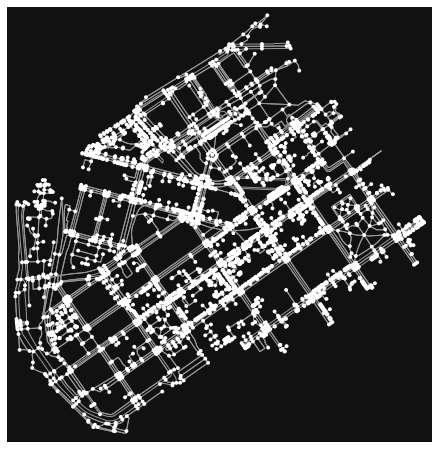

In [7]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

### Graph to GeoDataFrame
We can now plot all these different OSM layers by using the familiar plot() function of geopandas. As you might remember, the street network data is not a GeoDataFrame, but a graph object. Luckily, OSMnx provides a convenient function graph_to_gdfs() that can convert the graph into two separate GeoDataFrames where the first one contains the information about the nodes and the second one about the edge.

Let’s extract the nodes and edges from the graph as GeoDataFrames:

In [8]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
25216594,60.164794,24.921057,5,NaN,NaN,POINT (24.92106 60.16479)
25238874,60.163665,24.921028,4,NaN,NaN,POINT (24.92103 60.16366)
25238883,60.163452,24.921441,4,crossing,NaN,POINT (24.92144 60.16345)
25238933,60.161114,24.924529,3,NaN,NaN,POINT (24.92453 60.16111)
25238937,60.160860,24.925861,3,NaN,NaN,POINT (24.92586 60.16086)


In [9]:
edges.head()

osmid  oneway lanes            name   highway  \
u        v          key                                                      
25216594 1372425721 0     23717777    True     2   Porkkalankatu   primary   
         1372425714 0     23856784    True     2  Mechelininkatu   primary   
25238874 336192701  0     29977177    True     3  Mechelininkatu   primary   
         1519889266 0    930820886    True     1    Itämerenkatu  tertiary   
25238883 568147264  0     58077048    True     4  Mechelininkatu   primary   

                        maxspeed  length  \
u        v          key                    
25216594 1372425721 0         40  10.404   
         1372425714 0         40  40.885   
25238874 336192701  0         40   5.843   
         1519889266 0         30  10.879   
25238883 568147264  0         40  15.388   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238874 336192701  0    LINESTRING (24.92103 60.16366, 24.92104 60.16361)   
         1519889266 0    LINESTRING (24.92103 60.16366, 24.92083 60.16366)   
25238883 568147264  0    LINESTRING (24.92144 60.16345, 24.92140 60.16359)   

                        junction tunnel access bridge service  ref  
u        v          key                                             
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN  NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN  NaN  
25238874 336192701  0        NaN    NaN    NaN    NaN     NaN  NaN  
         1519889266 0        NaN    NaN    NaN    NaN     NaN  NaN  
25238883 568147264  0        NaN    NaN    NaN    NaN     NaN  NaN

### Place polygon
Let’s also plot the Polygon that represents our area of interest (Kamppi, Helsinki). We can retrieve the Polygon geometry using the [geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf) -function.

In [12]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

In [13]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92064 60.16483, 24.92069 60.16447...",60.172075,60.160469,24.943453,24.920642,281831782,relation,184714,60.16628,24.932083,"Kamppi, Helsinki, Helsinki sub-region, Uusimaa...",boundary,administrative,0.760313


<AxesSubplot:>

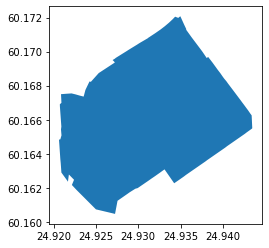

In [14]:
# Plot the area:
area.plot()

### Building footprints
It is also possible to retrieve other types of OSM data features with OSMnx such as buildings or points of interest (POIs). Let’s download the buildings with OSMnx geometries_from_place() -function and plot them on top of our street network in Kamppi.

When fetching spesific types of geometries from OpenStreetMap using OSMnx geometries_from_place we also need to specify the correct tags. For getting all types of buildings, we can use the tag building=yes.

In [15]:
# List key-value pairs for tags
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)
len(buildings)

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


438

In [16]:
buildings.head()

amenity          operator wheelchair  \
element_type osmid                                           
way          8035238      NaN               NaN        NaN   
             8042297      NaN               NaN        NaN   
             14797170     NaN  City of Helsinki        NaN   
             14797171     NaN               NaN        NaN   
             14797172     NaN               NaN        NaN   

                                                                geometry  \
element_type osmid                                                         
way          8035238   POLYGON ((24.93563 60.17045, 24.93557 60.17054...   
             8042297   POLYGON ((24.92938 60.16795, 24.92933 60.16797...   
             14797170  POLYGON ((24.92427 60.16648, 24.92427 60.16650...   
             14797171  POLYGON ((24.92390 60.16729, 24.92391 60.16731...   
             14797172  POLYGON ((24.92647 60.16689, 24.92648 60.16689...   

                       source access addr:housenumber      addr:street  \
element_type osmid                                                       
way          8035238      NaN    NaN            22-24  Mannerheimintie   
             8042297      NaN    NaN                2   Runeberginkatu   
             14797170  survey    NaN               10  Lapinlahdenkatu   
             14797171  survey    NaN              NaN              NaN   
             14797172  survey    NaN              NaN              NaN   

                      addr:unit  ref  ... lippakioski takeaway  \
element_type osmid                    ...                        
way          8035238        NaN  NaN  ...         NaN      NaN   
             8042297        NaN  NaN  ...         NaN      NaN   
             14797170       NaN  NaN  ...         NaN      NaN   
             14797171       NaN  NaN  ...         NaN      NaN   
             14797172       NaN  NaN  ...         NaN      NaN   

                      outdoor_seating addr:floor covered area ways type  \
element_type osmid                                                        
way          8035238              NaN        NaN     NaN  NaN  NaN  NaN   
             8042297              NaN        NaN     NaN  NaN  NaN  NaN   
             14797170             NaN        NaN     NaN  NaN  NaN  NaN   
             14797171             NaN        NaN     NaN  NaN  NaN  NaN   
             14797172             NaN        NaN     NaN  NaN  NaN  NaN   

                      electrified nohousenumber  
element_type osmid                               
way          8035238          NaN           NaN  
             8042297          NaN           NaN  
             14797170         NaN           NaN  
             14797171         NaN           NaN  
             14797172         NaN           NaN  

[5 rows x 102 columns]

### Points-of-interest
It is also possible to retrieve other types of geometries from OSM using the geometries_from_place by passing different tags. Point-of-interest (POI) is a generic concept that describes point locations that represent places of interest.

In OpenStreetMap, many POIs are described using the amenity-tags. We can, for excample, retrieve all restaurat locations by referring to the tag amenity=restaurant. See all available amenity categories from OSM wiki.

Note: We used the pois_from_place() method to retrieve POIs in older versions of OSMnx.

Let’s retrieve restaurants that are located in our area of interest:

In [18]:
# List key-value pairs for tags
tags = {'amenity': 'restaurant'}
# Retrieve restaurants
restaurants = ox.geometries_from_place(place_name, tags)

# How many restaurants do we have?
len(restaurants)

166

In [19]:
# Available columns
restaurants.columns.values

array(['addr:city', 'addr:country', 'addr:housenumber', 'addr:postcode',
       'addr:street', 'amenity', 'cuisine', 'diet:halal', 'diet:kosher',
       'name', 'phone', 'website', 'wheelchair', 'geometry',
       'toilets:wheelchair', 'opening_hours', 'delivery:covid19',
       'opening_hours:covid19', 'takeaway:covid19', 'diet:vegetarian',
       'name:fi', 'name:zh', 'short_name', 'description', 'diet:vegan',
       'contact:phone', 'contact:website', 'source', 'outdoor_seating',
       'check_date:opening_hours', 'addr:housename', 'email', 'level',
       'address', 'access:covid19', 'drive_through:covid19', 'takeaway',
       'delivery', 'url', 'brunch', 'lunch:menu', 'reservation', 'room',
       'opening_hours:brunch', 'toilets', 'capacity', 'smoking',
       'access:dog', 'operator', 'shop', 'alt_name', 'contact:email',
       'established', 'name:sv', 'brand', 'brand:wikidata',
       'brand:wikipedia', 'floor', 'name:en', 'description:en',
       'old_name', 'highchair', 'lun

In [20]:
# Select some useful cols and print
cols = ['name', 'opening_hours', 'addr:city', 'addr:country', 
        'addr:housenumber', 'addr:postcode', 'addr:street']

# Print only selected cols
restaurants[cols].head(10)

name  \
element_type osmid                                 
node         60062502                     Kabuki   
             62965963               Empire Plaza   
             76617692               Johan Ludvig   
             76624339        Ravintola Rivoletto   
             76624351                     Pueblo   
             76627823                     Atabar   
             89074039                Papa Albert   
             151006260           Ravintola China   
             151006483  Tony's deli + Street Bar   
             151006932                Haru Sushi   

                                                            opening_hours  \
element_type osmid                                                          
node         60062502                                                 NaN   
             62965963                                                 NaN   
             76617692                                                 NaN   
             76624339   Mo-Th 11:00-23:00; Fr 11:00-24:00; Sa 15:00-24...   
             76624351                                                 NaN   
             76627823                                                 NaN   
             89074039   Mo-Th 10:00-14:00, 17:30-22:00; Fr 11:00-23:00...   
             151006260       Mo-Fr 11:00-23:00; Sa-Su 12:00-23:00; PH off   
             151006483                                                NaN   
             151006932  Mo-Fr 11:00-21:00; Sa 12:00-21:00; Su 13:00-21:00   

                       addr:city addr:country addr:housenumber addr:postcode  \
element_type osmid                                                             
node         60062502   Helsinki           FI               12         00180   
             62965963        NaN          NaN              NaN           NaN   
             76617692   Helsinki           FI              NaN           NaN   
             76624339   Helsinki           FI               38         00120   
             76624351   Helsinki           FI              NaN           NaN   
             76627823   Helsinki           FI              NaN           NaN   
             89074039   Helsinki           FI               30         00120   
             151006260  Helsinki           FI               25         00100   
             151006483  Helsinki           FI                7         00120   
             151006932  Helsinki           FI               30         00120   

                            addr:street  
element_type osmid                       
node         60062502   Lapinlahdenkatu  
             62965963               NaN  
             76617692               NaN  
             76624339      Albertinkatu  
             76624351       Eerikinkatu  
             76627823       Eerikinkatu  
             89074039      Albertinkatu  
             151006260        Annankatu  
             151006483        Bulevardi  
             151006932    Fredrikinkatu

### Plotting the data
Let’s create a map out of the streets, buildings, restaurants, and the area Polygon but let’s exclude the nodes (to keep the figure clearer).

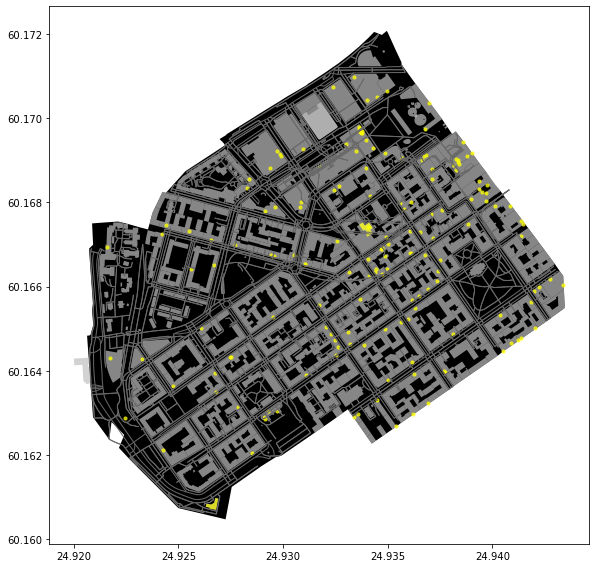

In [21]:
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

### Extra: Park polygons
Notice that we can retrieve all kinds of different features from OpenStreetMap using the geometries_from_place() method by passing different OpenStreetMap tags.

Let’s try to fetch all public parks in the Kamppi area. In OpenStreetMap, parks are often tagged as leisure=park. We can also add other green surfaces, such as landuse=grass. see OpenStreetMap, and OSM wiki for more details.

We need to start by fetching all footprints from the tag leisure:

In [22]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

In [23]:
# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 55 objects


In [24]:
parks.head(3)

geometry  \
element_type osmid                                                         
way          8042256   POLYGON ((24.93566 60.17132, 24.93566 60.17130...   
             8042613   POLYGON ((24.93701 60.16947, 24.93627 60.16919...   
             15218362  POLYGON ((24.92330 60.16499, 24.92323 60.16500...   

                      access  source addr:city  \
element_type osmid                               
way          8042256     NaN     NaN       NaN   
             8042613     NaN     NaN       NaN   
             15218362    NaN  survey       NaN   

                                                                   nodes  \
element_type osmid                                                         
way          8042256   [292719496, 1001543836, 1037987967, 1001544060...   
             8042613   [552965718, 293390264, 295056669, 256264975, 1...   
             15218362  [144181223, 150532964, 150532958, 150532966, 1...   

                      leisure                name             name:fi  \
element_type osmid                                                      
way          8042256     park                 NaN                 NaN   
             8042613     park      Simonpuistikko      Simonpuistikko   
             15218362    park  Työmiehenpuistikko  Työmiehenpuistikko   

                             name:sv hoitoluokitus_viheralue wikidata  \
element_type osmid                                                      
way          8042256             NaN                     NaN      NaN   
             8042613   Simonsskvären                     NaN      NaN   
             15218362  Arbetarparken                      A2      NaN   

                      wikipedia landuse alt_name loc_name  
element_type osmid                                         
way          8042256        NaN     NaN      NaN      NaN  
             8042613        NaN     NaN      NaN      NaN  
             15218362       NaN     NaN      NaN      NaN

In [25]:
parks.columns.values

array(['geometry', 'access', 'source', 'addr:city', 'nodes', 'leisure',
       'name', 'name:fi', 'name:sv', 'hoitoluokitus_viheralue',
       'wikidata', 'wikipedia', 'landuse', 'alt_name', 'loc_name'],
      dtype=object)

<AxesSubplot:>

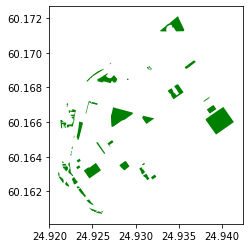

In [26]:
parks.plot(color="green")

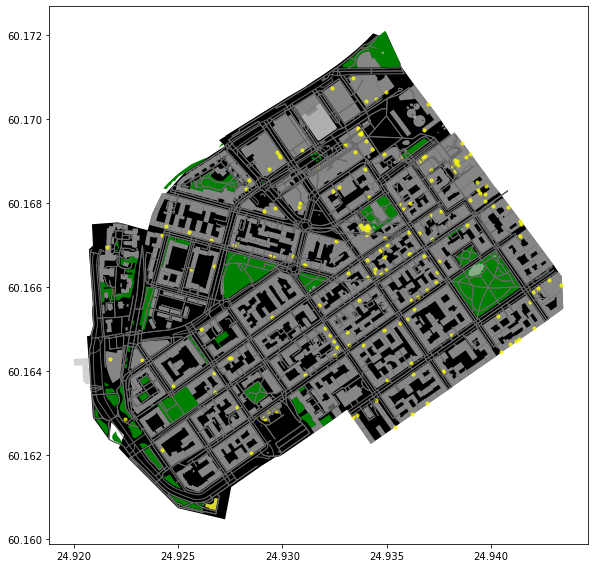

In [27]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color='yellow', alpha=0.7, markersize=10)
plt.tight_layout()

**Check your understading**

Retrieve OpenStreetMap data from some other area! Download these elements using OSMnx functions from your area of interest:

Extent of the area using geocode_to_gdf()

Street network using graph_from_place(), and convert to gdf using graph_to_gdfs()

Building footprints (and other geometries) using geometries_from_place() and appropriate tags.

Note, the larger the area you choose, the longer it takes to retrieve data from the API! Use parameter network_type=drive to limit the graph query to filter out un-driveable roads.

In [28]:
place_name = "Telki, Hungary"

In [29]:
# Fetch OSM street network from the location
graph = ox.graph_from_place(place_name)

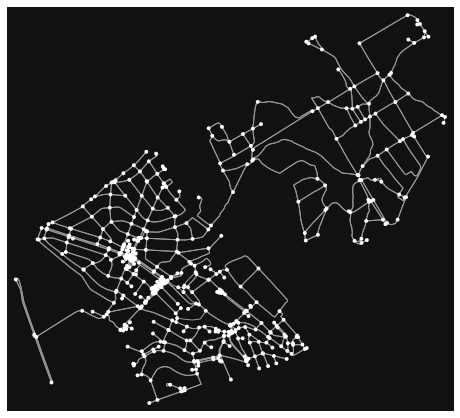

In [30]:
# Plot the streets
fig, ax = ox.plot_graph(graph)

In [44]:
# Retrieve nodes and edges
nodes, edges = ox.graph_to_gdfs(graph)
edges = edges[edges['highway']=='residential']

In [32]:
# List key-value pairs for tags
tags = {'building': True}

In [33]:
buildings = ox.geometries_from_place(place_name, tags)

In [34]:
len(buildings)

1175

In [35]:
# List key-value pairs for tags
tags = {'leisure': 'park', 'landuse': 'grass'}

In [36]:
# Get the data
parks = ox.geometries_from_place(place_name, tags)

# Check the result
print("Retrieved", len(parks), "objects")

Retrieved 1 objects


In [39]:
# Get place boundary related to the place name as a geodataframe
area = ox.geocode_to_gdf(place_name)# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

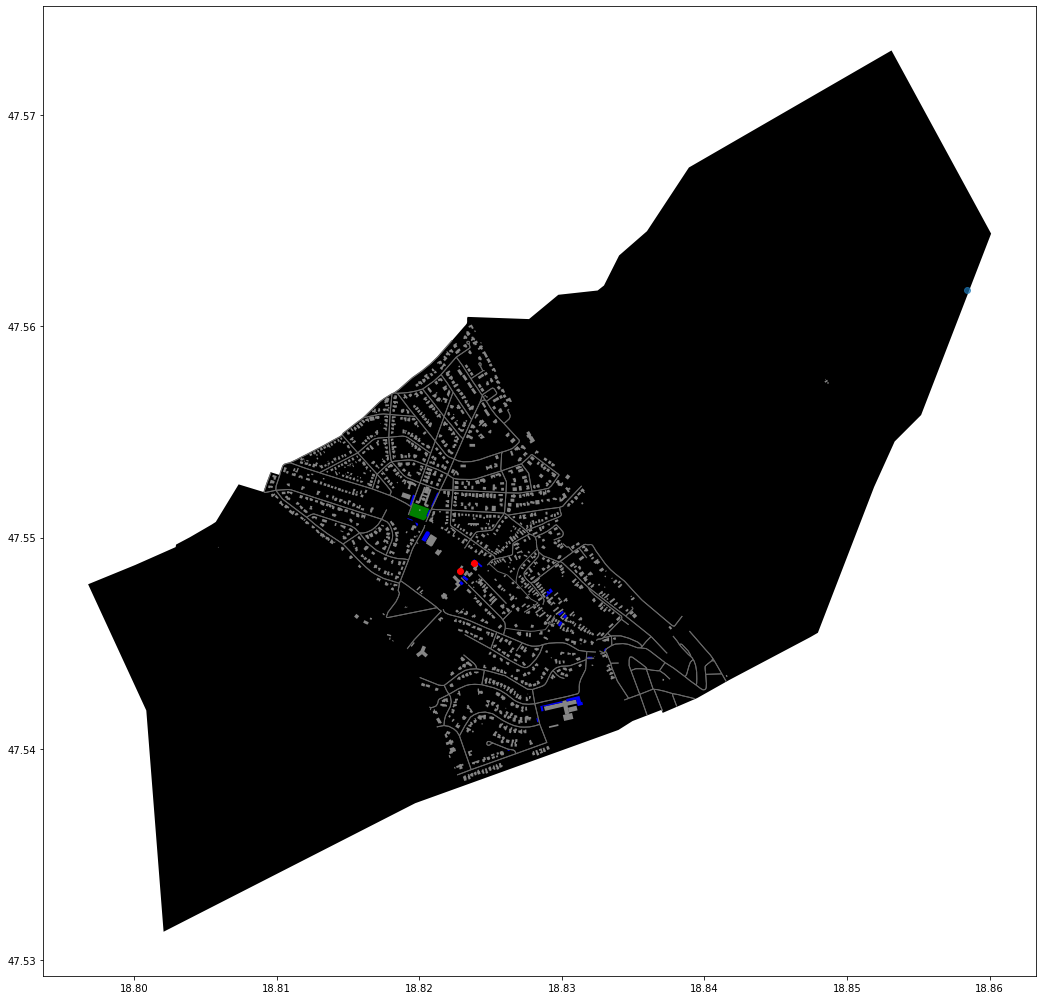

In [54]:
# Create a subplot object for plotting the layers onto a common map
fig, ax = plt.subplots(figsize=(20,14))

# Plot the footprint
area.plot(ax=ax, facecolor='black')

# Plot the parks
parks.plot(ax=ax, facecolor="green")

# Plot street edges
edges.plot(ax=ax, linewidth=1, edgecolor='dimgray')

# Plot buildings
buildings.plot(ax=ax, facecolor='silver', alpha=0.7)

tags = {'healthcare': ['doctor','pharmacy']}
healthcare = ox.geometries_from_place(place_name, tags)
tags = {'amenity': 'parking'}
parking = ox.geometries_from_place(place_name, tags)

parking.plot(ax=ax, facecolor='blue')
healthcare.plot(ax=ax, facecolor='red')


plt.tight_layout()

## Network analysis in Python
Finding a shortest path using a specific street network is a common GIS problem that has many practical applications. For example navigators are one of those “every-day” applications where routing using specific algorithms is used to find the optimal route between two (or multiple) points.

It is also possible to perform network analysis such as tranposrtation routing in Python. Networkx is a Python module that provides tools for analyzing networks in various different ways. It also contains algorithms such as Dijkstra’s algorithm or A* algoritm that are commonly used to find shortest paths along transportation network.

To be able to conduct network analysis, it is, of course, necessary to have a network that is used for the analyses. The OSMnx package enables us to retrieve routable networks from OpenStreetMap for various transport modes (walking, cycling and driving). OSMnx also combines some functionalities from networkx module to make it straightforward to conduct routing analysis based on OpenStreetMap data.

Next we will test the routing functionalities of OSMnx by finding a shortest path between two points based on drivable roads. With tiny modifications, it is also possible to repeat the analysis for the walkable street network.

### Get the network
Let’s again start by importing the required modules

In [55]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from pyproj import CRS
import contextily as ctx

When fetching netowrk data from OpenStreetMap using OSMnx, it is possible to define the type of street network using the network_type parameter (see options from the OSMnx documentation). Let’s download the OSM data from Kamppi but this only the bike network. If that does not work, try the driveable network (less roads, faster query..).

In [56]:
place_name = "Kamppi, Helsinki, Finland"

# Retrieve the network
graph = ox.graph_from_place(place_name, network_type='bike')

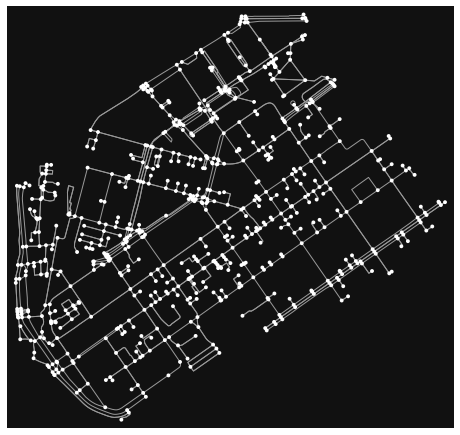

In [57]:
# plot the graph:
fig, ax = ox.plot_graph(graph)

Pro tip! Sometimes the shortest path might go slightly outside the defined area of interest. To account for this, we can fetch the network for a bit larger area than the district of Kamppi, in case the shortest path is not completely inside its boundaries.

In [58]:
# Get the area of interest polygon
place_polygon = ox.geocode_to_gdf(place_name)

# Re-project the polygon to a local projected CRS 
place_polygon = place_polygon.to_crs(epsg=3067)

# Buffer a bit
place_polygon["geometry"] = place_polygon.buffer(200)

# Re-project the polygon back to WGS84, as required by osmnx
place_polygon = place_polygon.to_crs(epsg=4326)

# Retrieve the network
graph = ox.graph_from_polygon(place_polygon["geometry"].values[0], network_type='bike')

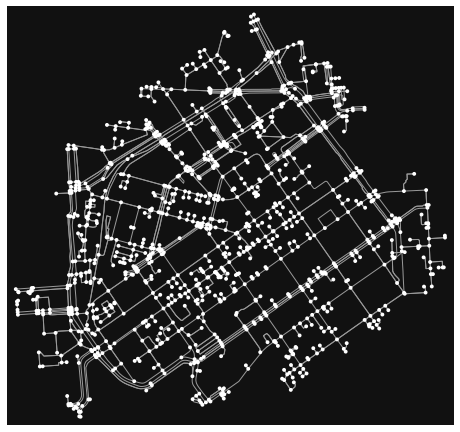

In [59]:
fig, ax = ox.plot_graph(graph)

Okey so now we have streets for the travel mode we specified earlier. Let’s have a colser look at the attributes of the street network. Easiest way to do this is to convert the graph (nodes and edges) into GeoDataFrames.

Converting graph into a GeoDataFrame can be done with function graph_to_gdfs() that we already used in previous tutorial. With parameters nodes and edges, it is possible to control whether to retrieve both nodes and edges from the graph.

In [60]:
# Retrieve only edges from the graph
edges = ox.graph_to_gdfs(graph, nodes=False, edges=True)
# Check columns
edges.columns

Index(['osmid', 'oneway', 'lanes', 'name', 'highway', 'maxspeed', 'length',
       'geometry', 'junction', 'access', 'bridge', 'tunnel', 'service'],
      dtype='object')

In [61]:
# Check crs
edges.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [62]:
edges.head()

osmid  oneway lanes             name  \
u        v          key                                                       
25216594 1372425721 0               23717777    True     2    Porkkalankatu   
         1372425714 0               23856784    True     2   Mechelininkatu   
25238865 146447626  0    [59355210, 4229487]   False     2        Santakatu   
         57661989   0                7842621   False   NaN  Sinikaislankuja   
         314767800  0              231643806   False   NaN              NaN   

                             highway maxspeed  length  \
u        v          key                                 
25216594 1372425721 0        primary       40  10.404   
         1372425714 0        primary       40  40.885   
25238865 146447626  0    residential       30  44.303   
         57661989   0    residential       30  76.704   
         314767800  0       cycleway      NaN  60.066   

                                                                  geometry  \
u        v          key                                                      
25216594 1372425721 0    LINESTRING (24.92106 60.16479, 24.92087 60.16479)   
         1372425714 0    LINESTRING (24.92106 60.16479, 24.92095 60.164...   
25238865 146447626  0    LINESTRING (24.91994 60.16279, 24.91932 60.162...   
         57661989   0    LINESTRING (24.91994 60.16279, 24.91995 60.162...   
         314767800  0    LINESTRING (24.91994 60.16279, 24.92014 60.162...   

                        junction access bridge tunnel service  
u        v          key                                        
25216594 1372425721 0        NaN    NaN    NaN    NaN     NaN  
         1372425714 0        NaN    NaN    NaN    NaN     NaN  
25238865 146447626  0        NaN    NaN    NaN    NaN     NaN  
         57661989   0        NaN    NaN    NaN    NaN     NaN  
         314767800  0        NaN    NaN    NaN    NaN     NaN

Okey, so we have quite many columns in our GeoDataFrame. Most of the columns are fairly self-explanatory but the following table describes all of them. Most of the attributes come directly from the OpenStreetMap, however, columns u and v are Networkx specific ids. You can click on the links to get more information about each attribute:

In [63]:
edges['highway'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 5231, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


service                      878
cycleway                     489
residential                  466
tertiary                     217
primary                      165
pedestrian                   158
secondary                    121
unclassified                  42
living_street                 16
[cycleway, residential]        6
[living_street, service]       6
[residential, pedestrian]      4
[cycleway, pedestrian]         4
tertiary_link                  2
[service, pedestrian]          2
primary_link                   1
[unclassified, service]        1
Name: highway, dtype: int64

I now we can confirm that as a result our street network indeed only contains such streets where it is allowed to drive with a car as there are no e.g. cycleways or footways included in the data.

As the data is in WGS84 format, we might want to reproject our data into a metric system before proceeding to the shortest path analysis. We can re-project the graph from latitudes and longitudes to an appropriate UTM zone using the project_graph() function from OSMnx.

In [64]:
# Project the data
graph_proj = ox.project_graph(graph) 
# Get Edges and Nodes
nodes_proj, edges_proj = ox.graph_to_gdfs(graph_proj, nodes=True, edges=True)

In [65]:
print("Coordinate system:", edges_proj.crs)

Coordinate system: +proj=utm +zone=35 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +type=crs


In [66]:
edges_proj.head()

osmid  oneway  \
u          v          key                                                    
25216594   1372425721 0                                   23717777    True   
           1372425714 0                                   23856784    True   
1372425721 25290781   0                                   29191566   False   
           60070671   0          [930820929, 930820930, 654270815]   False   
1372425714 25238874   0    [78537378, 8169098, 29081876, 78537375]    True   

                            lanes            name   highway maxspeed   length  \
u          v          key                                                       
25216594   1372425721 0         2   Porkkalankatu   primary       40   10.404   
           1372425714 0         2  Mechelininkatu   primary       40   40.885   
1372425721 25290781   0       NaN             NaN  cycleway      NaN  228.587   
           60070671   0       NaN             NaN  cycleway      NaN   41.006   
1372425714 25238874   0    [3, 2]  Mechelininkatu   primary       40   85.540   

                                                                    geometry  \
u          v          key                                                      
25216594   1372425721 0    LINESTRING (384631.322 6671580.071, 384620.884...   
           1372425714 0    LINESTRING (384631.322 6671580.071, 384624.750...   
1372425721 25290781   0    LINESTRING (384620.884 6671579.965, 384621.184...   
           60070671   0    LINESTRING (384620.884 6671579.965, 384620.720...   
1372425714 25238874   0    LINESTRING (384624.179 6671539.986, 384623.768...   

                          junction bridge tunnel access service  
u          v          key                                        
25216594   1372425721 0        NaN    NaN    NaN    NaN     NaN  
           1372425714 0        NaN    NaN    NaN    NaN     NaN  
1372425721 25290781   0        NaN    NaN    NaN    NaN     NaN  
           60070671   0        NaN    NaN    NaN    NaN     NaN  
1372425714 25238874   0        NaN    NaN    NaN    NaN     NaN

Okey, as we can see from the CRS the data is now in UTM projection using zone 35 which is the one used for Finland, and indeed the orientation of the map and the geometry values also confirm this.

### Analyzing the network properties
Now as we have seen some of the basic functionalities of OSMnx such as downloading the data and converting data from graph to GeoDataFrame, we can take a look some of the analytical features of omsnx. Osmnx includes many useful functionalities to extract information about the network.

To calculate some of the basic street network measures we can use basic_stats() function in OSMnx:

In [67]:
# Calculate network statistics
stats = ox.basic_stats(graph_proj, circuity_dist='euclidean')
stats

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\stats.py:370: UserWarning: The `circuity_dist` argument has been deprecated and will be removed in a future release.
  warnings.warn(msg)


{'n': 1197,
 'm': 2578,
 'k_avg': 4.307435254803676,
 'edge_length_total': 91387.91999999997,
 'edge_length_avg': 35.44915438324281,
 'streets_per_node_avg': 2.7017543859649122,
 'streets_per_node_counts': {0: 0, 1: 321, 2: 16, 3: 577, 4: 265, 5: 18},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.2681704260651629,
  2: 0.013366750208855471,
  3: 0.48203842940685043,
  4: 0.22138680033416874,
  5: 0.015037593984962405},
 'intersection_count': 876,
 'street_length_total': 57052.897999999885,
 'street_segment_count': 1576,
 'street_length_avg': 36.20107741116744,
 'circuity_avg': 1.0416637411172323,
 'self_loop_proportion': 0.0019035532994923859}

To be able to extract the more advanced statistics (and some of the missing ones above) from the street network, it is required to have information about the coverage area of the network. Let’s calculate the area of the convex hull of the street network and see what we can get.

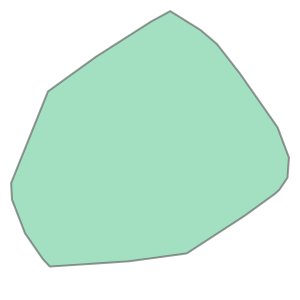

In [68]:
# Get the Convex Hull of the network
convex_hull = edges_proj.unary_union.convex_hull

# Show output
convex_hull

In [69]:
# Calculate the area
area = convex_hull.area

# Calculate statistics with density information
stats = ox.basic_stats(graph_proj, area=area)
extended_stats = ox.extended_stats(graph_proj, ecc=True, cc=True)

# Add extened statistics to the basic statistics
for key, value in extended_stats.items():
    stats[key] = value
    
# Convert the dictionary to a Pandas series for a nicer output
pd.Series(stats)

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\stats.py:458: UserWarning: The extended_stats function has been deprecated and will be removed in a future release. Use NetworkX directly for extended topological measures.
  warnings.warn(msg)
C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\networkx\algorithms\link_analysis\pagerank_alg.py:107: DeprecationWarning: networkx.pagerank_scipy is deprecated and will be removed in NetworkX 3.0, use networkx.pagerank instead.
  return pagerank_scipy(


n                                                                                   1197
m                                                                                   2578
k_avg                                                                           4.307435
edge_length_total                                                               91387.92
edge_length_avg                                                                35.449154
streets_per_node_avg                                                            2.701754
streets_per_node_counts                     {0: 0, 1: 321, 2: 16, 3: 577, 4: 265, 5: 18}
streets_per_node_proportions           {0: 0.0, 1: 0.2681704260651629, 2: 0.013366750...
intersection_count                                                                   876
street_length_total                                                            57052.898
street_segment_count                                                                1576
street_length_avg    

As we can see, now we have a LOT of information about our street network that can be used to understand its structure. We can for example see that the average node density in our network is 149 nodes/km and that the total edge length of our network is almost 20 kilometers.

Furthermore, we can see that the degree centrality of our network is on average 0.0326515. Degree is a simple centrality measure that counts how many neighbors a node has (here a fraction of nodes it is connected to). Another interesting measure is the PageRank that measures the importance of specific node in the graph. Here we can see that the most important node in our graph seem to a node with osmid 25416262. PageRank was the algorithm that Google first developed (Larry Page & Sergei Brin) to order the search engine results and became famous for.

You can read the Wikipedia article about different centrality measures if you are interested what the other centrality measures mean.

## Shortest path analysis
Let’s now calculate the shortest path between two points using the shortest path function in Networkx.

### Origin and destination points
First we need to specify the source and target locations for our route. If you are familiar with the Kamppi area, you can specify a custom placename as a source location. Or, you can follow along and choose these points as the origin and destination in the analysis:

- Maria 01 - and old hospital area and current startup hub.

- ruttopuisto - a park. Official name of this park is “Vanha kirkkopuisto”, but nominatim is also able to geocode the nickname.

We could figure out the coordinates for these locations manually, and create shapely points based on the coordinates. However, it is more handy to fetch the location of our source destination directly from OSM:

In [70]:
# Set place name
placename = "Maria 01, Helsinki"

# Geocode the place name
geocoded_place = ox.geocode_to_gdf(placename)

# Check the result
geocoded_place

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((24.92122 60.16644, 24.92126 60.16625...",60.167525,60.16624,24.92317,24.921221,105520837,way,23856740,60.166884,24.921661,"Maria 01, Mechelininkatu, Hietalahti, Kamppi, ...",building,yes,0.58084


As output, we received the building footprint. From here, we can get the centroid as the source location of our shortest path analysis. However, we first need to project the data into the correct crs:

In [72]:
# Re-project into the same CRS as the road network
geocoded_place = geocoded_place.to_crs(CRS(edges_proj.crs))

# Get centroid as shapely point
origin = geocoded_place["geometry"].centroid.values[0]

print(origin)

POINT (384692.1787195493 6671817.486579246)


In [73]:
# Set place name
placename = "ruttopuisto"

# Geocode the place name
geocoded_place = ox.geocode_to_gdf(placename)

# Re-project into the same CRS as the road network
geocoded_place = geocoded_place.to_crs(CRS(edges_proj.crs))

# Get centroid of the polygon as shapely point
destination = geocoded_place["geometry"].centroid.values[0]

print(destination)

POINT (385673.4277923344 6671690.223032337)


Now we have shapely points representing the origin and destination locations for our network analysis. Next step is to find these points on the routable network before the final routing.

### Nearest node
Let’s now find the nearest graph nodes (and their node IDs) to these points using OSMnx get_nearest_node. As a starting point, we have the two Shapely Point objects we just defined as the origin and destination locations.

According to the documentation of this function, we need to parse Point coordinates as coordinate-tuples in this order: latitude, longitude(or y, x). As our data is now projected to UTM projection, we need to specify with method parameter that the function uses 'euclidean' distances to calculate the distance from the point to the closest node (with decimal derees, use 'haversine', which determines the great-circle distances). The method parameter is important if you want to know the actual distance between the Point and the closest node which you can retrieve by specifying parameter return_dist=True.

In [75]:
# Get origin x and y coordinates
orig_xy = (origin.y, origin.x)

# Get target x and y coordinates
target_xy = (destination.y, destination.x)

In [76]:
# Find the node in the graph that is closest to the origin point (here, we want to get the node id)
orig_node_id = ox.get_nearest_node(graph_proj, orig_xy, method='euclidean')
orig_node_id

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


319719983

In [77]:
# Find the node in the graph that is closest to the target point (here, we want to get the node id)
target_node_id = ox.get_nearest_node(graph_proj, target_xy, method='euclidean')
target_node_id

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\distance.py:356: UserWarning: The `get_nearest_node` function has been deprecated and will be removed in a future release. Use the more efficient `distance.nearest_nodes` instead.
  warnings.warn(msg)


1377208998

In [78]:
# Retrieve the rows from the nodes GeoDataFrame based on the node id (node id is the index label)
orig_node = nodes_proj.loc[orig_node_id]
target_node = nodes_proj.loc[target_node_id]

In [83]:
# Create a GeoDataFrame from the origin and target points
od_nodes = gpd.GeoDataFrame([orig_node, target_node], geometry='geometry', crs=nodes_proj.crs)
od_nodes.head()

,y,x,street_count,lon,lat,highway,ref,geometry
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1377208998,6.671730e+06,385612.532846,3,24.938641,60.166412,NaN,NaN,POINT (385612.533 6671729.630)


Okay, as a result we got now the closest node IDs of our origin and target locations. As you can see, the index in this GeoDataFrame corresponds to the IDs that we found with get_nearest_node() function.

### Routing
Now we are ready to do the routing and find the shortest path between the origin and target locations by using the shortest_path() function of networkx. With weight -parameter we can specify that 'length' attribute should be used as the cost impedance in the routing. If specifying the weight parameter, NetworkX will use by default Dijkstra’s algorithm to find the optimal route. We need to specify the graph that is used for routing, and the origin ID (source) and the target ID in between the shortest path will be calculated:

In [85]:
# Calculate the shortest path
route = nx.shortest_path(G=graph_proj, source=orig_node_id, target=target_node_id, weight='length')

# Show what we have
print(route)

[319719983, 1382316822, 1382316829, 1382316852, 5464887863, 1382320461, 5154747161, 1378064352, 1372461709, 1372441203, 3205236795, 3205236793, 8244768393, 60278325, 56115897, 60072524, 7699019923, 7699019916, 7699019908, 7699019903, 267117319, 1897461604, 724233143, 724233128, 267117317, 846597945, 846597947, 2037356632, 1547012339, 569742461, 1372441189, 4524927399, 298372061, 7702074840, 7702074833, 60170471, 8856704555, 3227176325, 7676757030, 8856704573, 7676756995, 8856704588, 1377211668, 60170470, 8874925445, 3228706311, 1377211669, 1377209035, 1377208998]


As a result we get a list of all the nodes that are along the shortest path.

- We could extract the locations of those nodes from the nodes_proj GeoDataFrame and create a LineString presentation of the points, but luckily, OSMnx can do that for us and we can plot shortest path by using plot_graph_route() function:

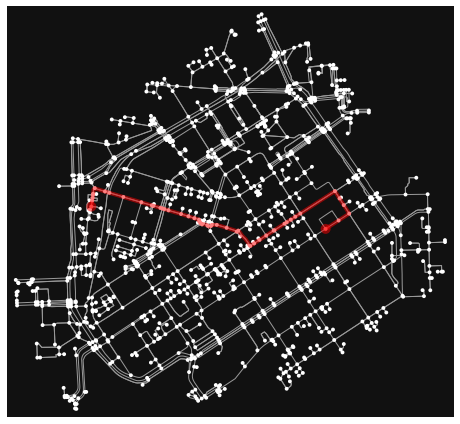

In [86]:
# Plot the shortest path
fig, ax = ox.plot_graph_route(graph_proj, route)

Nice! Now we have the shortest path between our origin and target locations. Being able to analyze shortest paths between locations can be valuable information for many applications. Here, we only analyzed the shortest paths based on distance but quite often it is more useful to find the optimal routes between locations based on the travelled time. Here, for example we could calculate the time that it takes to cross each road segment by dividing the length of the road segment with the speed limit and calculate the optimal routes by taking into account the speed limits as well that might alter the result especially on longer trips than here.

### Saving shortest paths to disk
Quite often you need to save the route into a file for further analysis and visualization purposes, or at least have it as a GeoDataFrame object in Python. Hence, let’s continue still a bit and see how we can turn the route into a linestring and save the shortest path geometry and related attributes into a geopackage file.

- First we need to get the nodes that belong to the shortest path:

In [87]:
# Get the nodes along the shortest path
route_nodes = nodes_proj.loc[route]
route_nodes

,y,x,street_count,lon,lat,highway,ref,geometry
osmid,,,,,,,,
319719983,6.671816e+06,384706.296089,3,24.922273,60.166932,NaN,NaN,POINT (384706.296 6671815.989)
1382316822,6.671839e+06,384709.579017,4,24.922319,60.167142,NaN,NaN,POINT (384709.579 6671839.311)
1382316829,6.671850e+06,384711.044607,3,24.922339,60.167236,NaN,NaN,POINT (384711.045 6671849.707)
1382316852,6.671861e+06,384712.504583,3,24.922359,60.167338,NaN,NaN,POINT (384712.505 6671860.984)
5464887863,6.671865e+06,384713.220293,3,24.922370,60.167377,NaN,NaN,POINT (384713.220 6671865.374)
1382320461,6.671887e+06,384719.671826,3,24.922473,60.167575,NaN,NaN,POINT (384719.672 6671887.215)
5154747161,6.671874e+06,384758.946564,3,24.923188,60.167471,NaN,NaN,POINT (384758.947 6671874.411)
1378064352,6.671869e+06,384776.322613,3,24.923504,60.167428,NaN,NaN,POINT (384776.323 6671869.117)
1372461709,6.671853e+06,384830.142058,3,24.924482,60.167300,NaN,NaN,POINT (384830.142 6671853.149)


As we can see, now we have all the nodes that were part of the shortest path as a GeoDataFrame.

Now we can create a LineString out of the Point geometries of the nodes:

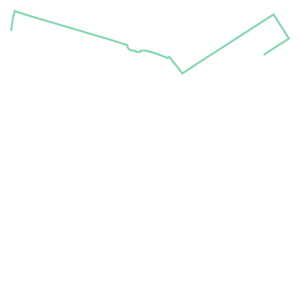

In [90]:
from shapely.geometry import LineString, Point

# Create a geometry for the shortest path
route_line = LineString(list(route_nodes.geometry.values))
route_line

Now we have the route as a LineString geometry.

- Let’s make a GeoDataFrame out of it having some useful information about our route such as a list of the osmids that are part of the route and the length of the route.

In [98]:
# Create a GeoDataFrame
route_geom = gpd.GeoDataFrame([[route_line]], geometry='geometry', crs=edges_proj.crs, columns=['geometry'])

# Add a list of osmids associated with the route
route_geom.loc[0, 'osmids'] = str(list(route_nodes.reset_index()['osmid'].values))

# Calculate the route length
route_geom['length_m'] = route_geom.length

route_geom.head()

,geometry,osmids,length_m
0,"LINESTRING (384706.296 6671815.989, 384709.579...","[319719983, 1382316822, 1382316829, 1382316852...",1342.967643


Now we have a GeoDataFrame that we can save to disk. Let’s still confirm that everything is ok by plotting our route on top of our street network and some buildings, and plot also the origin and target points on top of our map.

- Get buildings:

C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
C:\Users\alfoldybalint\.conda\envs\python_gis\lib\site-packages\osmnx\geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):


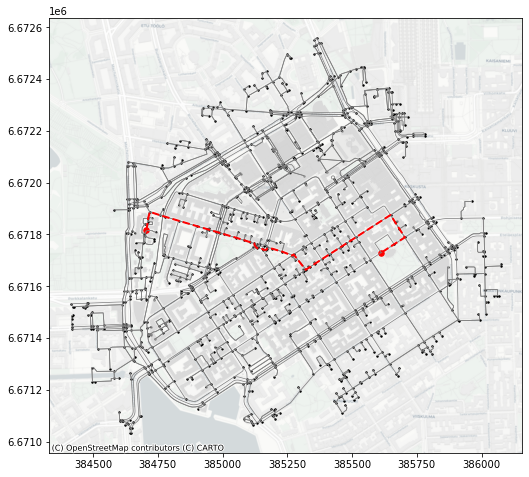

In [100]:
tags = {'building': True}
buildings = ox.geometries_from_place(place_name, tags)

# re-project buildings
buildings_proj = buildings.to_crs(CRS(edges_proj.crs))

# Let’s now plot the route and the street network elements to verify that everything is as it should:
fig, ax = plt.subplots(figsize=(12,8))

# Plot edges and nodes
edges_proj.plot(ax=ax, linewidth=0.75, color='gray')
nodes_proj.plot(ax=ax, markersize=2, color='black')

# Add buildings
ax = buildings_proj.plot(ax=ax, facecolor='lightgray', alpha=0.7)

# Add the route
ax = route_geom.plot(ax=ax, linewidth=2, linestyle='--', color='red')

# Add the origin and destination nodes of the route
ax = od_nodes.plot(ax=ax, markersize=30, color='red')

# Add basemap
ctx.add_basemap(ax, crs=buildings_proj.crs, source=ctx.providers.CartoDB.Positron)

Great everything seems to be in order! As you can see, now we have a full control of all the elements of our map and we can use all the aesthetic properties that matplotlib provides to modify how our map will look like. Now we are almost ready to save our data into disk.

### Prepare data for saving to file
The data contain certain data types (such as list or boolean) that should be converted into character strings prior to saving the data to file.Another option would be to drop invalid columns.

In [105]:
# Check if columns contain any list values
(edges_proj.applymap(type) == list).any()

osmid        True
oneway      False
lanes        True
name         True
highway      True
maxspeed     True
length      False
geometry    False
junction    False
bridge      False
tunnel      False
access      False
service      True
dtype: bool

In [106]:
# Columns with invalid values
invalid_cols = ['lanes', 'maxspeed', 'name', 'oneway', 'osmid', "highway", "service"]

#  convert selected columns to string format
edges_proj[invalid_cols] = edges_proj[invalid_cols].astype(str)

# Check again if columns contain any list values
(edges_proj.applymap(type) == list).any()

osmid       False
oneway      False
lanes       False
name        False
highway     False
maxspeed    False
length      False
geometry    False
junction    False
bridge      False
tunnel      False
access      False
service     False
dtype: bool

In [108]:
import os

# Parse the place name for the output file names (replace spaces with underscores and remove commas)
place_name_out = place_name.replace(' ', '_').replace(',','')

# Output directory
out_dir = "data"

# Create output fp for a geopackage
out_fp = os.path.join(out_dir, f"OSM_{place_name_out}.gpkg")

# Save files
edges_proj.to_file(out_fp, layer="streets", driver="GPKG")
route_geom.to_file(out_fp, layer="route", driver="GPKG")
nodes_proj.to_file(out_fp, layer="nodes", driver="GPKG")
od_nodes.to_file(out_fp, layer="route_OD", driver="GPKG")
buildings[['geometry', 'name', 'addr:street']].to_file(out_fp, layer="buildings", driver="GPKG")

### Advanced reading
Here we learned how to solve a simple routing task between origin and destination points. What about if we have hundreads or thousands of origins? This is the case if you want to explore the travel distances to a spesific location across the whole city, for example, when analyzing the accessibility of jobs and services (like in the Travel Time Matrix dataset used in previous sections).

Check out pyrosm documentation on working with graphs for more advanced examples of network analysis in python. For example, pandana is a fast and efficient python library for creating aggretated network analysis in no time across large networks, and pyrosm can be used for preparing the input data for such analysis.